## Aprendizagem Automática - Projeto

In [54]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Models and selection methods
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# Linear regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr


from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, MultiLabelBinarizer
from typing import Sequence

In [55]:
# Funcoes auxiliares

#NÃO SEI SE É NECESSÁRIO POIS SÓ VAI SER PREVISTO 1/2 ANOS
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))
    

#Função que escolha o dataframe até um certo ano apenas, que remove os países que contenham nan nesse intervalo de tempo

def indexing(dataf, ano_i):
    X_list=dataf.drop(columns=dataf.iloc[:,[1,2,3]]+dataf.loc[:,[str(i) for i in range(1960,ano_i)]])
    X_list=X_list.T
    X_list=X_list.rename(columns=X_list.iloc[0]).drop(X_list.index[0])
    return X_list

def lags(df, lag, país):
    new_df=pd.DataFrame()
    new_df["dados"]=df[país]
    colunas = [str(i) + "lag" for i in range(1,lag+1)]

    for i,k in enumerate(colunas):
        new_df[k] = new_df["dados"].shift(+i+1)
    new_df=new_df.dropna()
    return new_df

def time_series(df, lag):
    binario = LabelBinarizer().fit(df.columns)
    df_final= pd.DataFrame()
    for pais in X_pop.columns:
        pais_bin=pd.DataFrame(data=list(binario.transform([pais]))*len(df[pais]),
                             columns=binario.classes_,
                             index=df.index)
        #Agora juntamos os lags e os dados respetivos
        df_mid=pd.DataFrame()
        df_mid=pd.concat((df_mid,lags(df, lag, pais),pais_bin),axis=1).dropna()

        #Finalmente, concatenamos tudo numa só DataFrame
        df_final = pd.concat((df_final, df_mid), sort=True)
    return df_final

Importação dos datasets

In [240]:
# Dados 1960-2016
fertility = pd.read_csv("fertility_rate.csv")
population= pd.read_csv("country_population.csv")
expectancy = pd.read_csv("life_expectancy.csv")

# Dados 1960-2020
fertility_2020 = pd.read_csv("fertility_2020.csv")
population_2020 = pd.read_csv("population_2020.csv")
expectancy_2020 = pd.read_csv("life_2020.csv")

#Criar os data frames

X_fert=indexing(fertility, 1960)
X_pop=indexing(population, 1960)
X_exp=indexing(expectancy, 1960)

fert_2020 = indexing(fertility_2020, 1960)
pop_2020 = indexing(population_2020, 1960)
exp_2020 = indexing(expectancy_2020, 1960)

X_pop

,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,54211.0,8996351.0,5643182.0,1608800.0,13411.0,92490932.0,92634.0,20619075.0,1874120.0,20013.0,...,32500.0,32670629.0,63699.0,3032160395.0,108646.0,947000.0,5172135.0,17456855.0,3044846.0,3747369.0
1961,55438.0,9166764.0,5753024.0,1659800.0,14375.0,95044497.0,101078.0,20953077.0,1941491.0,20486.0,...,34300.0,33666772.0,65713.0,3073368588.0,112119.0,966000.0,5260501.0,17920673.0,3140264.0,3870756.0
1962,56225.0,9345868.0,5866061.0,1711319.0,15370.0,97682294.0,112472.0,21287682.0,2009526.0,21117.0,...,35000.0,34684165.0,67808.0,3126509808.0,115788.0,994000.0,5351799.0,18401608.0,3240587.0,3999419.0
1963,56695.0,9533954.0,5980417.0,1762621.0,16412.0,100411076.0,125566.0,21621840.0,2077575.0,21882.0,...,39800.0,35722091.0,69964.0,3191786431.0,119561.0,1022000.0,5446063.0,18899275.0,3345145.0,4132756.0
1964,57032.0,9731361.0,6093321.0,1814135.0,17469.0,103239902.0,138529.0,21953929.0,2144998.0,22698.0,...,40800.0,36780985.0,72131.0,3257459749.0,123354.0,1050000.0,5543339.0,19412975.0,3452942.0,4269863.0
1965,57360.0,9938414.0,6203299.0,1864791.0,18549.0,106174988.0,150362.0,22283390.0,2211316.0,23520.0,...,43500.0,37860012.0,74289.0,3324545317.0,127068.0,1078000.0,5643643.0,19942303.0,3563407.0,4410212.0
1966,57715.0,10152331.0,6309770.0,1914573.0,19647.0,109230593.0,160481.0,22608748.0,2276031.0,24321.0,...,46200.0,38959334.0,76413.0,3394783656.0,130688.0,1106000.0,5748588.0,20486439.0,3676189.0,4553433.0
1967,58055.0,10372630.0,6414995.0,1965598.0,20758.0,112406932.0,170283.0,22932203.0,2339124.0,25116.0,...,49100.0,40074699.0,78522.0,3464689184.0,134193.0,1135000.0,5858638.0,21045785.0,3791887.0,4700041.0
1968,58386.0,10604346.0,6523791.0,2022272.0,21890.0,115680165.0,183194.0,23261278.0,2401140.0,25885.0,...,55700.0,41195835.0,80673.0,3535355320.0,137506.0,1163000.0,5971407.0,21622590.0,3912085.0,4851431.0
1969,58726.0,10854428.0,6642632.0,2081695.0,23058.0,119016542.0,203820.0,23605987.0,2462925.0,26614.0,...,60300.0,42309665.0,82940.0,3610178790.0,140518.0,1191000.0,6083619.0,22219897.0,4038923.0,5009514.0


Escolher a sample de 10 países aleatórios

In [57]:
sample = list(fertility["Country Name"].sample(n=10, random_state=483))
print(sample)

['Brunei Darussalam', 'Tajikistan', 'Niger', 'Small states', 'Monaco', 'Guatemala', 'Hong Kong SAR, China', 'Latin America & Caribbean', 'Slovak Republic', 'French Polynesia']


IGNORAR ESTA PARTE COM O GRAFICO

In [58]:
df=lags(X_fert,5, 'Afghanistan')
dfc=df.to_numpy()
X_train=np.delete(dfc,0,1)
y_train=dfc[:,0]
#print(X_train.shape)
X_train_fin,y_train_fin, X_test, y_test= X_train[:35], y_train[:35], X_train[-17:], y_train[-17:]
#print(y_train_fin, y_test)
lin_model=LinearRegression()
lin_model.fit(X_train_fin,y_train_fin)
pred=lin_model.predict(X_test)
#print(X_test)
#df

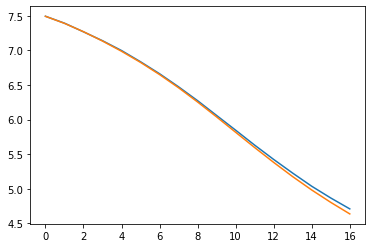

The RVE is:  0.9994022090438207
The rmse is:  0.034500090028036286
The Correlation Score is is: 1.0000 (p-value=1.595293e-35)

The Maximum Error is is:  0.07286944579076415
The Mean Absolute Error is:  0.026216308691658016


In [59]:
plt.plot(pred, label="pred")
plt.plot(y_test,label="true")
plt.show()
printRegStatistics(y_test, pred)

In [60]:
lin_model.predict([[4.635, 4.802, 4.981, 5.174, 5.38]])

array([4.55583905])

O CODIGO VOLTA AQUI

Vamos continuar a transformar o nosso dataset, de forma a que fiquem todas as séries temporais numa só coluna, a referência respetiva de que país se refere a série temporal e os respetivos lags para cada valor. 

In [71]:
#Versão final dos datasets
X_pop_fin=time_series(X_pop,5)
X_fert_fin=time_series(X_fert,5)
X_exp_fin=time_series(X_exp,5)

In [11]:
X_pop_fin.to_csv("dfpop.csv")
X_fert_fin.to_csv("dffert.csv")
X_exp_fin.to_csv("dfexp.csv")

Com isto feito, podemos passar ao treino dos modelos

In [267]:
# Função para criar um dataframe X para um dado dataset, pais e ano
def createX(dataset : pd.DataFrame, country : str, year : int) -> pd.DataFrame:
    previousYearCountryData = dataset.loc[(dataset[country] == 1) & (dataset.index.get_level_values(0) == str(year - 1))]
    newX = previousYearCountryData.copy()
    newX.index = [str(year)]
    for i in range(5,2,-1):
        newX.at[str(year), str(i)+"lag"] = newX.at[str(year),str(i-1)+"lag"]
    newX.at[str(year), "1lag"] = newX.at[str(year),"dados"]
    newX.drop(["dados"], axis=1, inplace=True)
    return newX

# Função para prever dados novos para um dado dataset ano e pais a partir do modelo treinado dado
def predictAndCalculateDelta(model, dataset : pd.DataFrame, country : str, year : int) -> float:
    previousYearCountryData = dataset.loc[(dataset[country] == 1) & (dataset.index.get_level_values(0) == str(year - 1))]
    newX = createX(dataset, country, year)
    x = model.predict(newX)
    x_previous = previousYearCountryData.at[str(year-1),"dados"]
    delta = x - x_previous
    return x[0], delta[0]

# Imprime os resultados de forma agradavel
def printResults(prediction, real, country : str, year : int):
    pred_x, pred_delta = prediction
    real_x, real_delta = real
    abs_error, rel_error = calculateErrors(real_x, pred_x)
    print("Country: %s" % country)
    print("Year: %d" % year)
    print("Predictions".ljust(30) + "Real")
    print(("Data: %.2f" % pred_x).ljust(30) + ("%.2f" % real_x))
    print(("Delta: %.2f" % pred_delta).ljust(30) + ("%.2f" % real_delta))
    print("Error:   Absolute = %.2f    Relative = %.5f\n" % (abs_error, rel_error))

# Vai buscar o valor para um dado ano e pais e calcula o delta
def determineRealResults(dataset : pd.DataFrame, country : str, year : int):
    real_data = dataset.at[str(year), country]
    previous_year_data = dataset.at[str(year-1), country]
    delta = real_data - previous_year_data
    return real_data, delta

# Erro relativo e absoluto
def calculateErrors(real, pred):
    abs_error = abs(pred - real)
    relative_error = abs_error / real
    return abs_error, relative_error

##### Teste para population

In [171]:
y_pop = X_pop_fin["dados"]
X_pop = X_pop_fin[list(X_pop_fin.columns)[:-1]] # Remover dados que é a ultima coluna

reg = DecisionTreeRegressor()
reg.fit(X_pop, y_pop)

DecisionTreeRegressor()

In [268]:
random_country_pop_stats = []
for country in sample[:5]:
    pred = predictAndCalculateDelta(reg, X_pop_fin, country, 2017)
    real = determineRealResults(pop_2020, country, 2017)
    random_country_pop_stats.append((country, pred, real))
    printResults(pred, real, country, 2017)

Country: Brunei Darussalam
Year: 2017
Predictions                   Real
Data: 430039.00               430276.00
Delta: 6843.00                4282.00
Error:   Absolute = 237.00    Relative = 0.00055

Country: Tajikistan
Year: 2017
Predictions                   Real
Data: 8954809.00              8925525.00
Delta: 219858.00              200207.00
Error:   Absolute = 29284.00    Relative = 0.00328

Country: Niger
Year: 2017
Predictions                   Real
Data: 21202118.00             21737922.00
Delta: 529131.00              816179.00
Error:   Absolute = 535804.00    Relative = 0.02465

Country: Small states
Year: 2017
Predictions                   Real
Data: 40626250.00             40727936.00
Delta: 997341.00              695127.00
Error:   Absolute = 101686.00    Relative = 0.00250

Country: Monaco
Year: 2017
Predictions                   Real
Data: 38499.00                37044.00
Delta: 0.00                   -27.00
Error:   Absolute = 1455.00    Relative = 0.03928



In [269]:
for country in sample[5:]:
    pred = predictAndCalculateDelta(reg, X_pop_fin, country, 2017)
    real = determineRealResults(pop_2020, country, 2017)
    random_country_pop_stats.append((country, pred, real))
    printResults(pred, real, country, 2017)

Country: Guatemala
Year: 2017
Predictions                   Real
Data: 17075243.00             16087418.00
Delta: 492774.00              259728.00
Error:   Absolute = 987825.00    Relative = 0.06140

Country: Hong Kong SAR, China
Year: 2017
Predictions                   Real
Data: 7376998.00              7393200.00
Delta: 40398.00               56600.00
Error:   Absolute = 16202.00    Relative = 0.00219

Country: Latin America & Caribbean
Year: 2017
Predictions                   Real
Data: 651036352.00            633797190.00
Delta: 13367675.00            6128720.00
Error:   Absolute = 17239162.00    Relative = 0.02720

Country: Slovak Republic
Year: 2017
Predictions                   Real
Data: 5430798.00              5439232.00
Delta: 0.00                   8434.00
Error:   Absolute = 8434.00    Relative = 0.00155

Country: French Polynesia
Year: 2017
Predictions                   Real
Data: 283790.00               295450.00
Delta: 3582.00                1909.00
Error:   Absolute = 1

In [271]:
random_country_pop_stats

[('Brunei Darussalam', (430039.0, 6843.0), (430276.0, 4282.0)),
 ('Tajikistan', (8954809.0, 219858.0), (8925525.0, 200207.0)),
 ('Niger', (21202118.0, 529131.0), (21737922.0, 816179.0)),
 ('Small states', (40626250.0, 997341.0), (40727936.0, 695127.0)),
 ('Monaco', (38499.0, 0.0), (37044.0, -27.0)),
 ('Guatemala', (17075243.0, 492774.0), (16087418.0, 259728.0)),
 ('Hong Kong SAR, China', (7376998.0, 40398.0), (7393200.0, 56600.0)),
 ('Latin America & Caribbean',
  (651036352.0, 13367675.0),
  (633797190.0, 6128720.0)),
 ('Slovak Republic', (5430798.0, 0.0), (5439232.0, 8434.0)),
 ('French Polynesia', (283790.0, 3582.0), (295450.0, 1909.0))]